# Mu-Sigma  HACKATHON

A personal loan is an unsecured credit provided by financial institutions based on criteria like employment history, repayment capacity, income level, profession, and credit history. This is also known as a consumer loan or a multi-purpose loan, and it helps the borrower meet any of their immediate needs.
One of the leading bankers in US has approached you to predict on the defaulters with the help of the recent data on the personal loans availed by various customers.
You are now asked to build a robust machine learning model that would distinguish the future applicants who might default and help the bank to take proactive measures.

## Importing Necessary Libraries

In [1]:
# import 'Pandas'
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt


# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

In [2]:
training = pd.read_csv('Data_Train.csv') 
test2 = pd.read_csv('Data_Test.csv') 

%matplotlib inline

In [3]:
training.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [4]:
test2.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,...,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,...,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,...,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,...,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,...,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [5]:
training.shape

(87500, 30)

In [6]:
training.dtypes

ID                       int64
Asst_Reg                 int64
GGGrade                 object
Experience              object
Validation              object
Yearly Income          float64
Home Status             object
Unpaid 2 years           int64
Already Defaulted        int64
Designation             object
Debt to Income         float64
Postal Code            float64
Lend Amount            float64
Deprecatory Records      int64
Interest Charged       float64
Usage Rate             float64
Inquiries                int64
Present Balance        float64
Gross Collection       float64
Sub GGGrade              int64
File Status             object
State                   object
Account Open             int64
Total Unpaid CL        float64
Duration                object
Unpaid Amount          float64
Reason                  object
Claim Type              object
Due Fee                float64
Loan/No Loan             int64
dtype: object

In [7]:
# Making copy of datset :

train = training.copy() 
test1 = test2.copy() 

In [8]:
# Droping unwanted columns from train and test1 both :
train.drop('ID',axis =1, inplace = True)
train.drop('Postal Code',axis =1, inplace = True)
test1.drop('ID',axis =1, inplace = True)
test1.drop('Postal Code',axis =1, inplace = True)

## 1 Data Cleaning

In [9]:
Train_Total_null = train.isnull().sum().sort_values()  

Percent_null = (train.isnull().sum()*100/train.isnull().count()).sort_values() 


missing_data = pd.concat([Train_Total_null, Percent_null], axis = 1, keys = ['Total_null', 'Percentage of Missing Values'])    
missing_data

,Total_null,Percentage of Missing Values
Asst_Reg,0,0.000000
Claim Type,0,0.000000
Reason,0,0.000000
Duration,0,0.000000
Account Open,0,0.000000
State,0,0.000000
File Status,0,0.000000
Sub GGGrade,0,0.000000
Gross Collection,0,0.000000
Present Balance,0,0.000000


In [10]:
Test_Total_null = test1.isnull().sum().sort_values()  

Percent_null = (test1.isnull().sum()*100/test1.isnull().count()).sort_values() 


missing_data = pd.concat([Test_Total_null, Percent_null], axis = 1, keys = ['Test_Total_null', 'Percentage of Missing Values'])    
missing_data

,Test_Total_null,Percentage of Missing Values
Asst_Reg,0,0.000000
Reason,0,0.000000
Duration,0,0.000000
Account Open,0,0.000000
State,0,0.000000
File Status,0,0.000000
Sub GGGrade,0,0.000000
Gross Collection,0,0.000000
Present Balance,0,0.000000
Inquiries,0,0.000000


**Inference** : We can infer that there are null values present in both train and test data. But the percentage of null values is low. 
1. The highest percentage of null value in Training set is follows:
 Train Data : Yearly Income	5575	6.371429

2. The highest percentage of null value in Test set is follows:
 Test Data : Yearly Income	2425	6.466667

In [11]:
# Before imputing null values, We will check the skewness of data:
train.skew()
test1.skew()
skewness = pd.concat([train.skew(), test1.skew()], axis = 1, keys = ['Train_Skew', 'Test_Skew'])    
skewness

,Train_Skew,Test_Skew
Asst_Reg,-0.086652,-0.095395
Yearly Income,16.865735,23.075748
Unpaid 2 years,5.000587,4.850818
Already Defaulted,20.344502,17.070925
Debt to Income,1.169490,0.224272
Lend Amount,0.640077,0.651859
Deprecatory Records,30.987894,6.089987
Interest Charged,0.000128,-0.005107
Usage Rate,0.343646,-0.160314
Inquiries,1.699121,1.694417


**Inference** : We can infer that there is skewness present in maximun variables of dataset. maximun attribute are right skewed 
except "Asst_Reg" variable in both train and test data and that is nearly to zero so it is under normal distribution.


In [12]:
# mode imputation on categorical Vriables:
train['Designation'] = train['Designation'].fillna(train.Designation.mode()[0])
test1['Designation'] = test1['Designation'].fillna(test1.Designation.mode()[0])

In [13]:
# median imputation on train numerical skewed Vriables:
train['Yearly Income']= train['Yearly Income'].fillna(train['Yearly Income'].median())
train['Debt to Income']= train['Debt to Income'].fillna(train['Debt to Income'].median())
train['Total Unpaid CL']= train['Total Unpaid CL'].fillna(train['Total Unpaid CL'].median())
train['Unpaid Amount']= train['Unpaid Amount'].fillna(train['Unpaid Amount'].median())

In [14]:
train.isnull().sum()

Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [15]:
# median imputation on test1 numerical skewed Vriables:
test1['Yearly Income']= test1['Yearly Income'].fillna(test1['Yearly Income'].median())
test1['Debt to Income']= test1['Debt to Income'].fillna(test1['Debt to Income'].median())
test1['Total Unpaid CL']= test1['Total Unpaid CL'].fillna(test1['Total Unpaid CL'].median())
test1['Unpaid Amount']= test1['Unpaid Amount'].fillna(test1['Unpaid Amount'].median())

In [16]:
test1.isnull().sum()

Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
dtype: int64

**Inference** : 
1. I have done mode imputation on "Designation" because it is a categorical column.
2. As we know if the null value percentage lies between 5 to 10 percent then we proceed to droping of rows. but this is a   banking loan approval dataset so every entry is important to us. I have done median imputation on remaining columns because i checked the skewness and found out skewness of these columns/ attributes are more than zero "0" so i opted for median imputation. because median value we can trust more than mean. 


* Outlier Treatment: (Training Set)

In [17]:
# the Target column is in integer so changing dtypes:
train['Loan/No Loan'] = train['Loan/No Loan'].astype(np.object)

In [18]:
# Splitting datset to numerical and categorical.

In [19]:
train_num = train.select_dtypes(include = np.number)

# description of numerical columns:
# we can get count, unique value, top value and frequency for each attribute present in database.


In [20]:
train_cat = train.select_dtypes(include = np.object)

In [21]:
test_num = test1.select_dtypes(include = np.number)

# description of numerical columns:
# we can get count, unique value, top value and frequency for each attribute present in database.

In [22]:
test_cat = test1.select_dtypes(include = np.object)

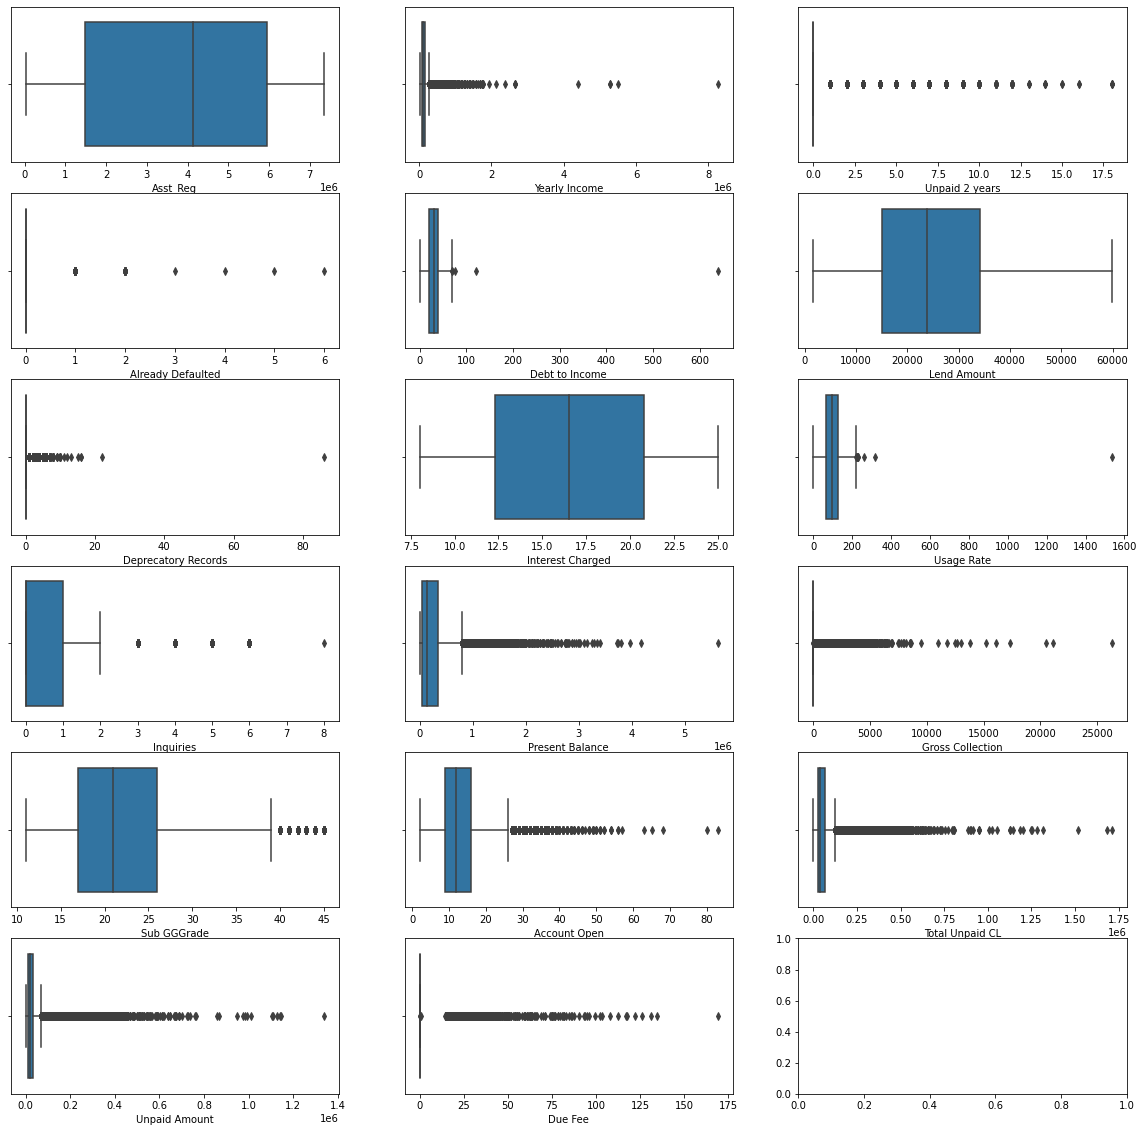

In [23]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20, 20))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(train_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(train_num[variable], ax = subplot)

# display the plot
plt.show()

**Inference** : We can clearly see there are some attribute (such as "Asst_req", "Lend amount", "Interest change"  ) which are not having any outliers. And then remaining columns have large no. of outliers. so we will proceed to Outlier Treatment.

In [23]:
train_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'Account Open', 'Total Unpaid CL',
       'Unpaid Amount', 'Due Fee'],
      dtype='object')

In [24]:
# Log transformation on Train_numerical set:

train_num_log =  np.log(train_num)
train_num_log.skew()

Asst_Reg              -1.109576
Yearly Income          0.331670
Unpaid 2 years              NaN
Already Defaulted           NaN
Debt to Income              NaN
Lend Amount           -0.757448
Deprecatory Records         NaN
Interest Charged      -0.395601
Usage Rate                  NaN
Inquiries                   NaN
Present Balance             NaN
Gross Collection            NaN
Sub GGGrade           -0.115038
Account Open          -0.107472
Total Unpaid CL       -0.209000
Unpaid Amount               NaN
Due Fee                     NaN
dtype: float64

**Inference** : We are doing log transformation on these columns because if we proceed with IQR or Zscore method they will remove outliers and we will end up loosing various data from our columns. So, we are transforming so our bank data will not be delete.

* Outlier Treatment: (Test Set)

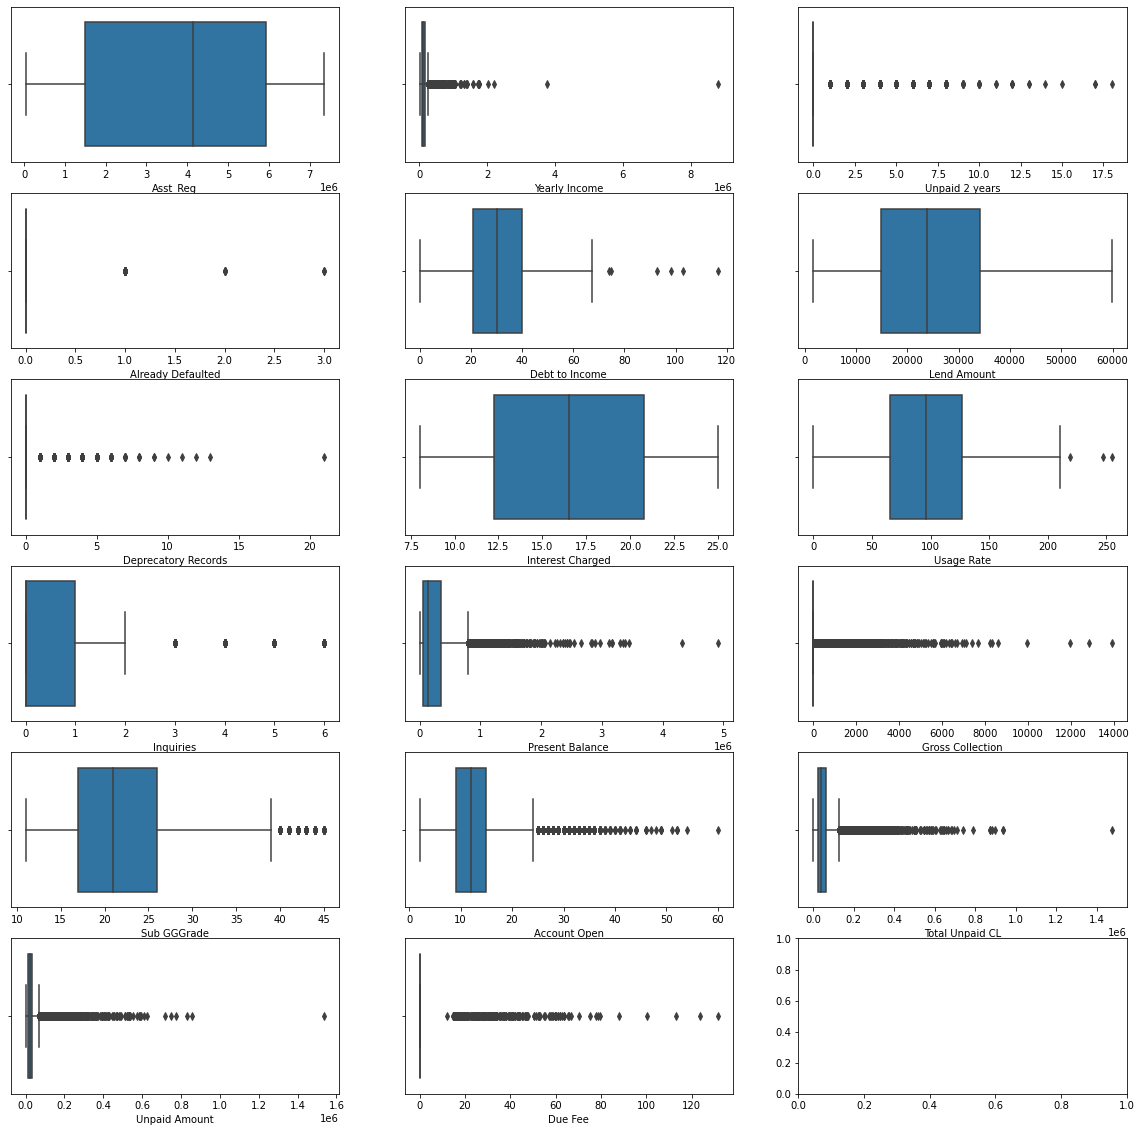

In [26]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20, 20))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(test_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(test_num[variable], ax = subplot)

# display the plot
plt.show()

**Inference** : We can clearly see there are some attribute (such as "Asst_req", "Lend amount", "Interest change"  ) which are not having any outliers. And then remaining columns have large no. of outliers. so we will proceed to outlier removal method using Inter Quartile Range.

In [25]:
# Log transformation on Test_numerical set:

test_num_log =  np.log(test_num)
test_num_log.skew()

Asst_Reg              -1.122596
Yearly Income          0.297951
Unpaid 2 years              NaN
Already Defaulted           NaN
Debt to Income              NaN
Lend Amount           -0.737270
Deprecatory Records         NaN
Interest Charged      -0.397423
Usage Rate                  NaN
Inquiries                   NaN
Present Balance             NaN
Gross Collection            NaN
Sub GGGrade           -0.122854
Account Open          -0.095470
Total Unpaid CL       -0.200812
Unpaid Amount               NaN
Due Fee                     NaN
dtype: float64

**Inference** : We are doing log transformation on these columns because if we proceed with IQR or Zscore method they will remove outliers and we will end up loosing various data from our columns. So, we are transforming so our bank data will not be delete.

## 2 Exploratory Data Analyis

#### Train set :

In [26]:
train_num.describe()

# to better understand the data, we will use .describe() method. this gives us the idea about centeral tendencies of the data.
# we can get mean value, count, standard deviation, min value, max value, Q1, Q3 Median value for each attribute.


,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
count,8.750000e+04,8.750000e+04,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.750000e+04,8.750000e+04,87500.000000
mean,3.798914e+06,1.335561e+05,0.332937,0.005726,30.910623,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.261827e+04,2.907608e+04,0.316407
std,2.289038e+06,9.575509e+04,0.876080,0.083505,13.797139,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.204695e+04,3.645688e+04,3.546087
min,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000
25%,1.483874e+06,8.624000e+04,0.000000,0.000000,20.848800,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.407000e+04,1.194948e+04,0.000000
50%,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000
75%,5.952909e+06,1.584000e+05,0.000000,0.000000,40.404000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.440800e+04,3.509604e+04,0.000000
max,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000


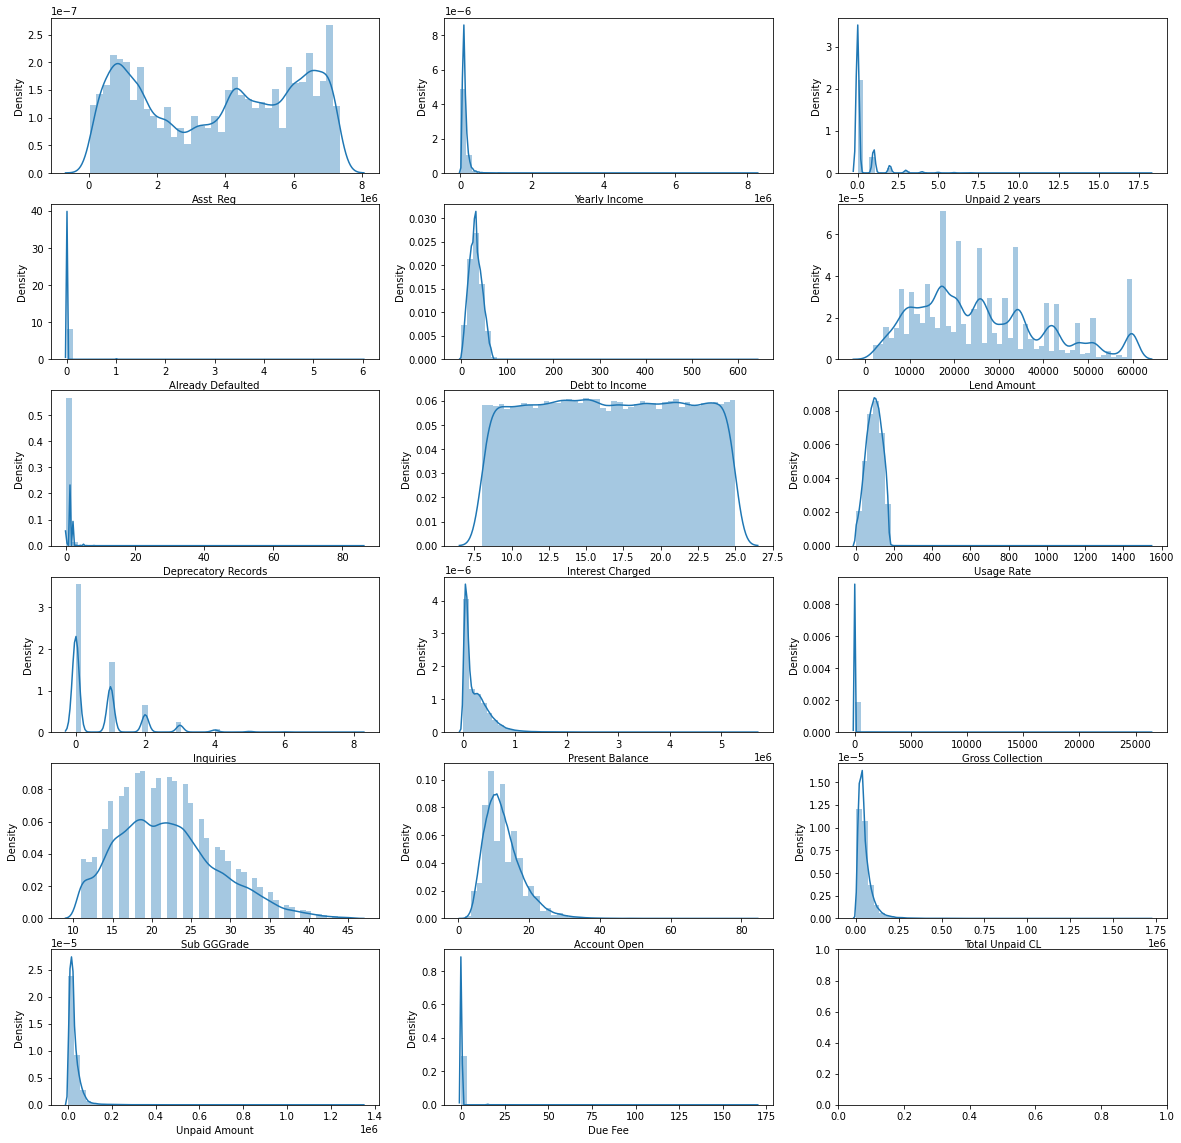

In [29]:
fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20, 20))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(train_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.distplot(train_num[variable], ax = subplot)

# display the plot
plt.show()

**Inference**: The above distplot display the distribution of each variable. 

From the plot we can see that the variables `Asst Req`, `Debt to Income` and `lend Amount`, `Interest changed`, `Usage Rate`, `Accountopen`, `SubGGGrade`,  follow normal distribution. All the remaining variables are positively distributed.

* Checking Correlation among Numerical Attributes:

In [27]:
train_num.corr()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
Asst_Reg,1.000000,0.034119,0.034842,0.011144,0.086785,0.035463,0.060083,-0.003918,-0.074356,-0.109052,0.010265,-0.111597,-0.027765,0.055217,0.057734,0.031170,-0.064833
Yearly Income,0.034119,1.000000,0.046357,0.014610,-0.200150,0.367188,-0.005755,0.000820,0.044918,0.041710,0.464332,0.010664,-0.084393,0.142658,0.319536,0.328360,0.010000
Unpaid 2 years,0.034842,0.046357,1.000000,0.139225,-0.016661,-0.012538,-0.013911,0.000769,-0.018248,0.032898,0.064146,0.000142,0.058871,0.044931,-0.047520,-0.033590,0.020816
Already Defaulted,0.011144,0.014610,0.139225,1.000000,0.000938,0.000148,0.000338,-0.002908,-0.031001,-0.003279,0.020608,-0.000966,0.029875,0.015250,0.008956,0.000962,0.011485
Debt to Income,0.086785,-0.200150,-0.016661,0.000938,1.000000,0.031789,-0.050841,-0.002217,0.159149,-0.003997,-0.008869,0.008351,0.172279,0.286565,0.080479,0.131515,-0.000344
Lend Amount,0.035463,0.367188,-0.012538,0.000148,0.031789,1.000000,-0.080907,-0.002999,0.115829,-0.030195,0.323443,0.070179,0.144200,0.180107,0.347009,0.333945,0.036821
Deprecatory Records,0.060083,-0.005755,-0.013911,0.000338,-0.050841,-0.080907,1.000000,0.002984,-0.080653,0.072078,-0.065633,-0.010535,0.051904,-0.024598,-0.100889,-0.093241,-0.005655
Interest Charged,-0.003918,0.000820,0.000769,-0.002908,-0.002217,-0.002999,0.002984,1.000000,-0.000879,-0.001635,-0.003021,-0.003095,-0.005658,0.001527,0.005918,0.003224,-0.001339
Usage Rate,-0.074356,0.044918,-0.018248,-0.031001,0.159149,0.115829,-0.080653,-0.000879,1.000000,-0.089634,0.080913,0.026460,0.229003,-0.157274,-0.129641,0.215522,0.024016
Inquiries,-0.109052,0.041710,0.032898,-0.003279,-0.003997,-0.030195,0.072078,-0.001635,-0.089634,1.000000,0.032073,0.039346,0.234991,0.131793,0.003089,-0.022763,0.019425


<AxesSubplot:>

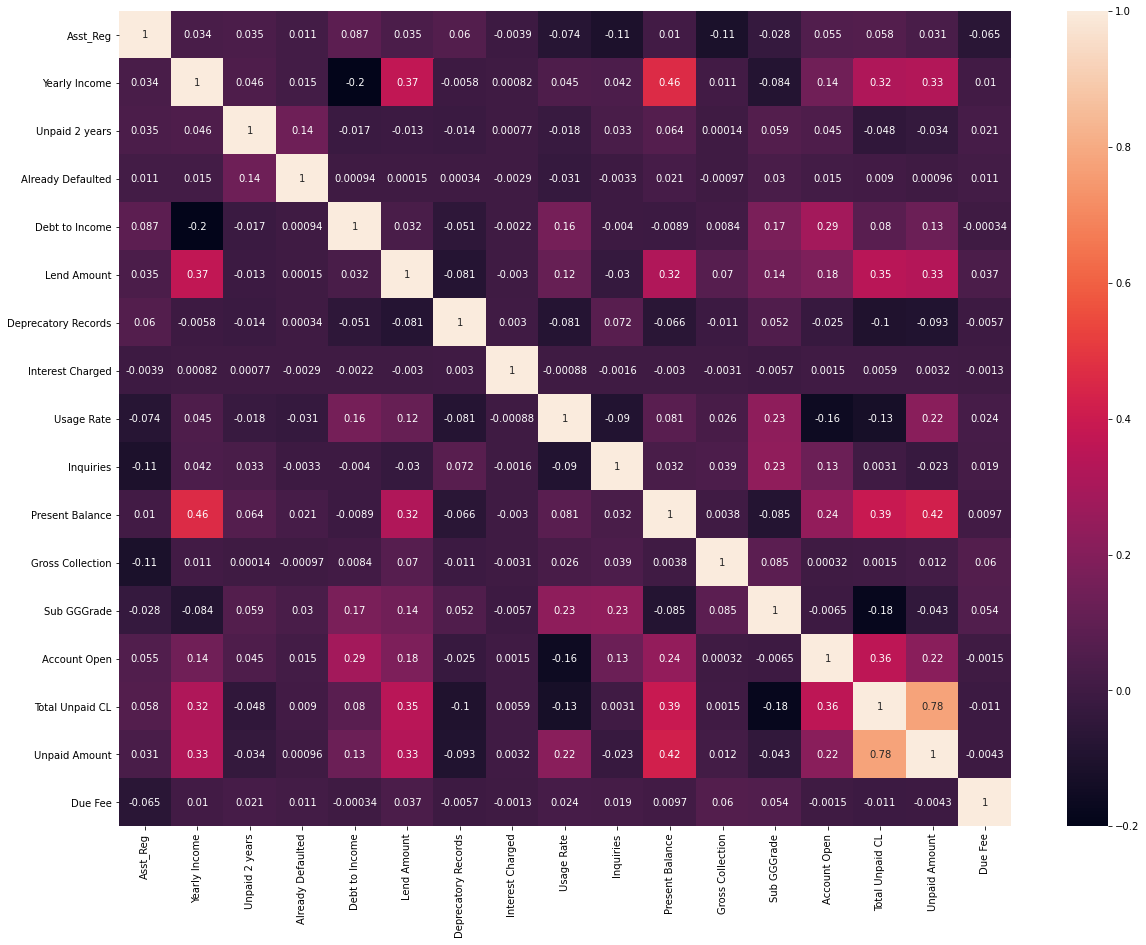

In [28]:

plt.figure(figsize=(20,15))
sns.heatmap(train_num.corr(),annot =True)

**Inference**: We can infer that only two attributes are having strong coorelation between them. 
* "Total unpaid Cl" And "Unpaid Amount" are showing strong coorelation between them. so to reduce retunduncy we will drop one cloumn from these both.
* Other ttributes are ok there is minimal or no correlation between them.

In [29]:
train_num.columns

Index(['Asst_Reg', 'Yearly Income', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'Account Open', 'Total Unpaid CL',
       'Unpaid Amount', 'Due Fee'],
      dtype='object')

In [30]:
train_num.drop('Total Unpaid CL',axis = 1, inplace =True)

In [31]:
train_cat.describe()

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type,Loan/No Loan
count,87500,87500,87500,87500,87500,87500,87500,87500,87500,87500,87500
unique,7,11,3,5,40354,2,49,2,13,2,2
top,II,>10yrs,Source Verified,MOR??AGE,School Teacher,whole,California,3 years,debt consolidation,I,0
freq,24966,30849,34504,44160,2999,46300,12625,60061,52559,87454,70988


In [32]:
# as we can see that the category datset is having too many labels in the column so checking labels : 
# Eg = Designation :  40354 labels it is so hard to EDA and encoding on this column. 
for col in train_cat.columns:
    print(col,': ', len(train_cat[col].unique()), 'labels')

GGGrade :  7 labels
Experience :  11 labels
Validation :  3 labels
Home Status :  5 labels
Designation :  40354 labels
File Status :  2 labels
State :  49 labels
Duration :  2 labels
Reason :  13 labels
Claim Type :  2 labels
Loan/No Loan :  2 labels


In [33]:
df_cat1 = train_cat.copy()
df_cat1 = df_cat1.drop('Designation', axis = 1) # dropping attribute because there are too many categories and it is hard and not easy to show on graph
df_cat1.head()

,GGGrade,Experience,Validation,Home Status,File Status,State,Duration,Reason,Claim Type,Loan/No Loan
0,II,>10yrs,Vfied,MOR??AGE,fully paid,California,3 years,debt consolidation,I,0
1,IV,7yrs,Source Verified,REN?,whole,NC,5 years,debt consolidation,I,0
2,III,<1yr,Source Verified,REN?,whole,Florida,5 years,major purchase,I,0
3,III,<1yr,Vfied,REN?,fully paid,NewJersey,3 years,major purchase,I,1
4,V,2yrs,Source Verified,REN?,fully paid,LA,5 years,debt consolidation,I,0


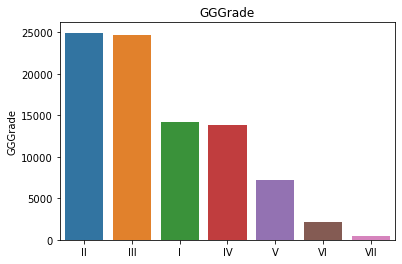

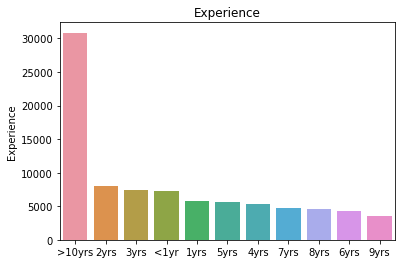

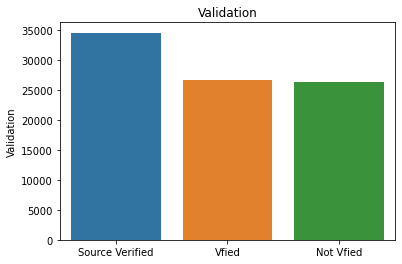

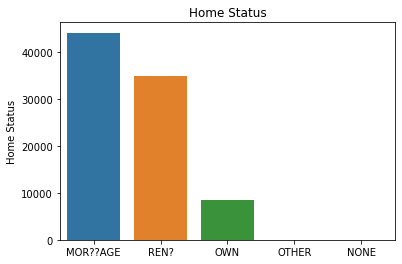

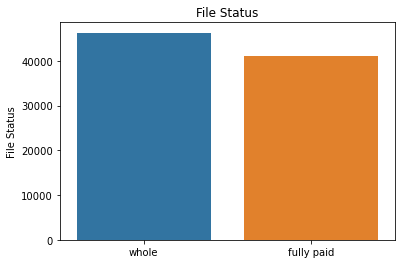

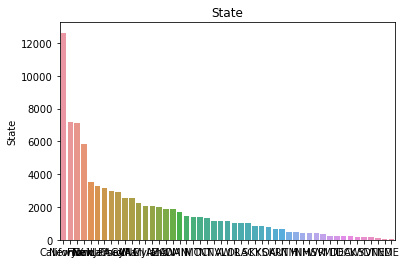

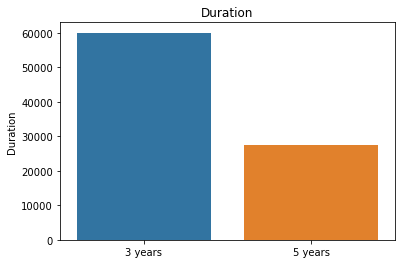

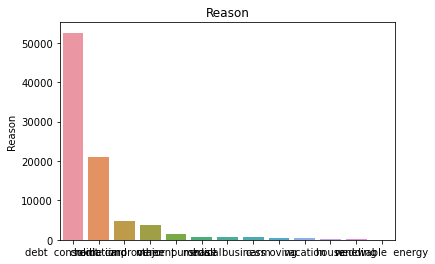

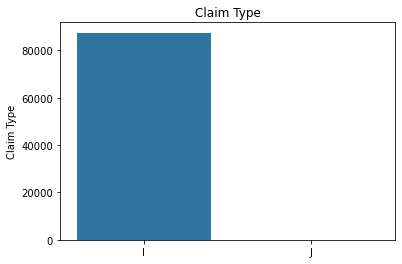

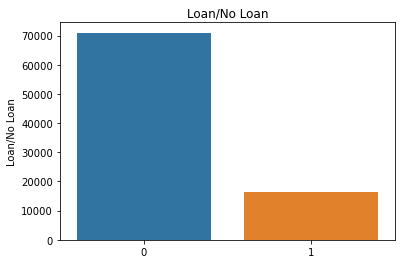

In [34]:
# Checking Categorical Variables
for i in df_cat1.columns:
    sns.barplot(df_cat1[i].value_counts().index,df_cat1[i].value_counts()).set_title(i)
    plt.show()

**Inference** : We can infer that there are columns that balanced. And there are columns like "claim type",etc. which are not properly balanced. 
* Target column (loan/no loan) is inbalanced  in which the 0 represents "loan not given" and 1 represents "loan given".
1. Loan/No Loan : Less loans are approved vs rejected.
2. Grant Group Grade : II is the highest and VII is the lowest.
3. Experience : There is large no of people greater than 10 years of experiece.
4. Vlidation : The data is normal in this sttribute there are almost equal no. verified and unverified people. but the source verified people are more.
5. Home Status : The count of people whose house status is mortage is more as compared to others.
6. File status : Status of loan file of fully paid peoples are less as compared to whole.
7. Duration : Duration for the amount is funded to borrower for 3 years is more as compared to 5 years.
8. Reason : Reason for loan application is more in debt consolidation label. 
9. Claaim type : As we know I - Individual Account , J - Joint Account. So from above we infer Individual account is more as compared.

* So now doing one hot encoding on train_cat_variables:

#### Test set :

In [35]:
test_num.describe()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
count,3.750000e+04,3.750000e+04,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.750000e+04,3.750000e+04,37500.000000
mean,3.804858e+06,1.327614e+05,0.336427,0.005307,30.889639,25828.004160,0.200080,16.511014,95.259109,0.676640,2.353528e+05,39.484071,22.031467,12.777787,5.277386e+04,2.880617e+04,0.309792
std,2.284115e+06,9.691460e+04,0.887640,0.077966,13.590078,14402.061788,0.563137,4.912595,40.493219,0.964515,2.543097e+05,364.114581,6.481257,5.360527,5.096555e+04,3.466786e+04,3.396315
min,3.752200e+04,8.800000e+03,0.000000,0.000000,0.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.000000,3.320000e+02,0.000000e+00,0.000000
25%,1.495828e+06,8.624000e+04,0.000000,0.000000,20.932800,14919.750000,0.000000,12.250000,65.532000,0.000000,5.129572e+04,0.000000,17.000000,9.000000,2.407000e+04,1.192212e+04,0.000000
50%,4.134010e+06,1.144000e+05,0.000000,0.000000,30.189600,23811.750000,0.000000,16.515000,96.492000,0.000000,1.383795e+05,0.000000,21.000000,12.000000,3.950800e+04,2.068074e+04,0.000000
75%,5.934898e+06,1.584000e+05,0.000000,0.000000,40.202400,34200.000000,0.000000,20.770000,126.764000,1.000000,3.514983e+05,0.000000,26.000000,15.000000,6.440800e+04,3.486904e+04,0.000000
max,7.351969e+06,8.800000e+06,18.000000,3.000000,116.508000,59850.000000,21.000000,25.000000,254.560000,6.000000,4.909890e+06,13900.000000,45.000000,60.000000,1.475408e+06,1.535830e+06,131.490000


<AxesSubplot:>

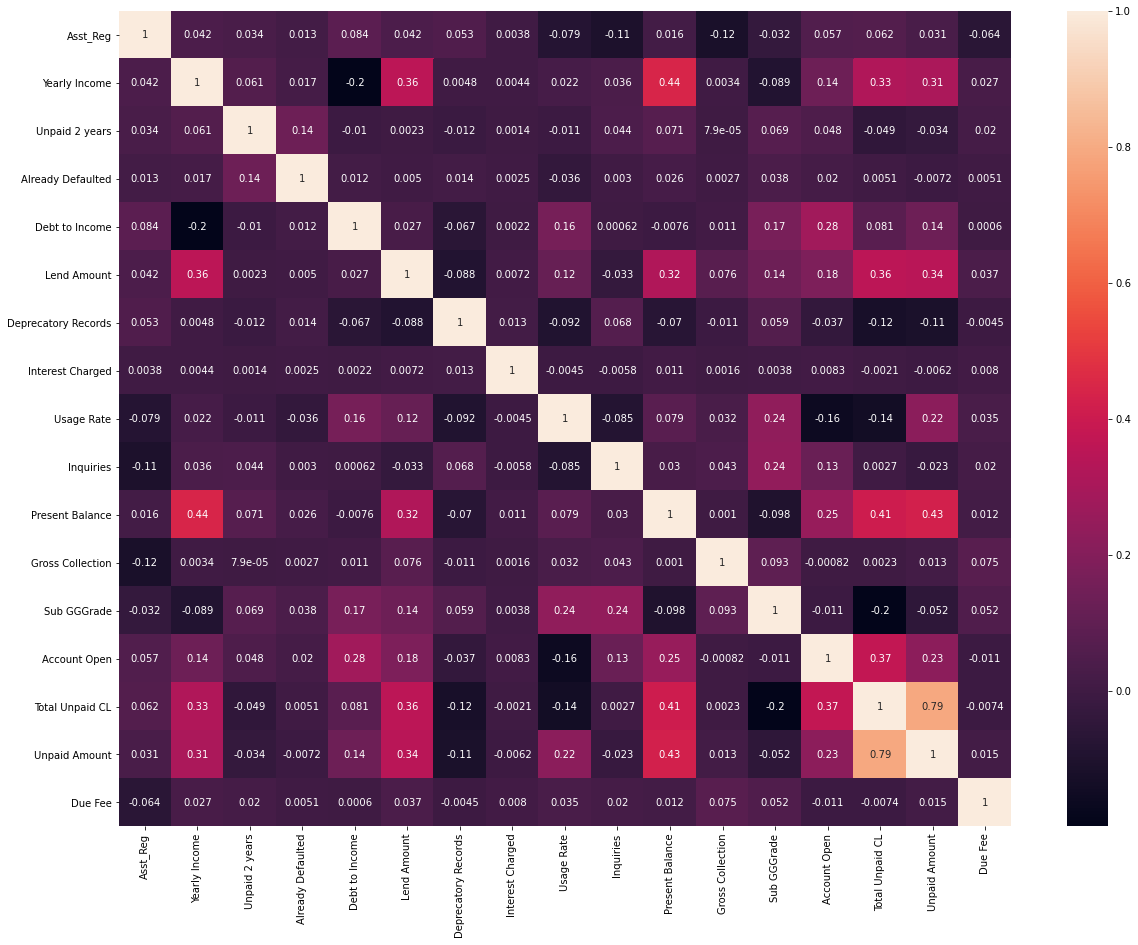

In [36]:
plt.figure(figsize = (20,15))
sns.heatmap(test_num.corr(),annot =True)

**Inference**: We can infer that only two attributes are having strong coorelation between them. 
* "Total unpaid Cl" And "Unpaid Amount" are showing strong coorelation between them. so to reduce retunduncy we will drop one cloumn from these both.
* Other ttributes are ok there is minimal or no correlation between them.



In [37]:
test_num.columns

test_num.drop('Total Unpaid CL',axis = 1, inplace =True)

In [38]:
test_cat.describe()

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type
count,37500,37500,37500,37500,37500,37500,37500,37500,37500,37500
unique,7,11,3,5,19510,2,49,2,13,2
top,III,>10yrs,Source Verified,MOR??AGE,School Teacher,whole,California,3 years,debt consolidation,I
freq,10682,13159,14646,18912,1252,19954,5514,25809,22463,37480


## 3 Feature Engineering

* Training Data:

In [39]:
train_cat.columns

Index(['GGGrade', 'Experience', 'Validation', 'Home Status', 'Designation',
       'File Status', 'State', 'Duration', 'Reason', 'Claim Type',
       'Loan/No Loan'],
      dtype='object')

In [40]:
# top 20 labels from variable "Designation".
train_cat.Designation.value_counts().sort_values(ascending = False).head(20)

School Teacher     2999
Super Lead         1322
Nurse               743
RN                  646
Owner               623
Supervisor          582
Sales               535
Project Manager     455
Office Manager      413
Driver              402
Director            387
General Manager     359
manager             359
teacher             340
owner               326
Engineer            305
President           296
Vice President      294
driver              255
Attorney            248
Name: Designation, dtype: int64

In [41]:
# LEt make list with most frequent category in 'Designation':
top_10 = [x for x in train_cat.Designation.value_counts().sort_values(ascending = False).head(10).index]

In [42]:
# set dummy variable for categorical column 'Designation':
def one_hot_top_x(train_cat, variable, top_x_labels):
    for label in top_x_labels:
        train_cat[variable+'_'+label] = np.where(train_cat[variable] == label, 1, 0)

train_cat

one_hot_top_x(train_cat, 'Designation', top_10)
train_cat.head()

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type,...,Designation_School Teacher,Designation_Super Lead,Designation_Nurse,Designation_RN,Designation_Owner,Designation_Supervisor,Designation_Sales,Designation_Project Manager,Designation_Office Manager,Designation_Driver
0,II,>10yrs,Vfied,MOR??AGE,GLENDALE NISSAN,fully paid,California,3 years,debt consolidation,I,...,0,0,0,0,0,0,0,0,0,0
1,IV,7yrs,Source Verified,REN?,Business Teacher,whole,NC,5 years,debt consolidation,I,...,0,0,0,0,0,0,0,0,0,0
2,III,<1yr,Source Verified,REN?,driver,whole,Florida,5 years,major purchase,I,...,0,0,0,0,0,0,0,0,0,0
3,III,<1yr,Vfied,REN?,AvePoint,fully paid,NewJersey,3 years,major purchase,I,...,0,0,0,0,0,0,0,0,0,0
4,V,2yrs,Source Verified,REN?,Lead Tester,fully paid,LA,5 years,debt consolidation,I,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# dropping designation as we carried out top 10 frequencies :
train_cat.drop('Designation',axis =1, inplace = True)


In [44]:
# LEt make list with most frequent category in 'State':
top_10 = [x for x in train_cat.State.value_counts().sort_values(ascending = False).head(10).index]

In [45]:
# set dummy variable for categorical column 'Designation':
def one_hot_top_x(train_cat, variable, top_x_labels):
    for label in top_x_labels:
        train_cat[variable+'_'+label] = np.where(train_cat[variable] == label, 1, 0)

train_cat

one_hot_top_x(train_cat, 'State', top_10)
train_cat.head()

,GGGrade,Experience,Validation,Home Status,File Status,State,Duration,Reason,Claim Type,Loan/No Loan,...,State_California,State_Newyork,State_TX,State_Florida,State_IL,State_NewJersey,State_PA,State_Ohio,State_GA,State_VA
0,II,>10yrs,Vfied,MOR??AGE,fully paid,California,3 years,debt consolidation,I,0,...,1,0,0,0,0,0,0,0,0,0
1,IV,7yrs,Source Verified,REN?,whole,NC,5 years,debt consolidation,I,0,...,0,0,0,0,0,0,0,0,0,0
2,III,<1yr,Source Verified,REN?,whole,Florida,5 years,major purchase,I,0,...,0,0,0,1,0,0,0,0,0,0
3,III,<1yr,Vfied,REN?,fully paid,NewJersey,3 years,major purchase,I,1,...,0,0,0,0,0,1,0,0,0,0
4,V,2yrs,Source Verified,REN?,fully paid,LA,5 years,debt consolidation,I,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# dropping designation as we carried out top 10 frequencies :
train_cat.drop('State',axis =1, inplace = True)


In [47]:
train_cat.shape

(87500, 29)

In [48]:
# Doing one hot encoding on remaining variables. The variable "loan and no loan" didnt encoded because it is a target column.
one_hot_encoded_data = pd.get_dummies(train_cat, columns = ['GGGrade', 'Experience', 'Validation', 'Home Status', 'File Status',
                                                            'Duration', 'Reason', 'Claim Type'])
one_hot_encoded_data

,Loan/No Loan,Designation_School Teacher,Designation_Super Lead,Designation_Nurse,Designation_RN,Designation_Owner,Designation_Supervisor,Designation_Sales,Designation_Project Manager,Designation_Office Manager,...,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_I,Claim Type_J
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
87496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
87497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
87498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
# Combining or concatinating numerical and categorical columns for model building.
train = pd.concat([train_num, one_hot_encoded_data], axis =1)
train.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,...,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_I,Claim Type_J
0,421802,633600.00,0,0,12.5496,42023.25,0,15.39,88.924,3,...,0,0,0,0,0,0,0,0,1,0
1,3964312,85483.20,0,0,9.0048,38133.00,0,9.94,102.856,0,...,0,0,0,0,0,0,0,0,1,0
2,4247560,79200.00,0,0,24.9144,17100.00,0,22.35,60.372,0,...,1,0,0,0,0,0,0,0,1,0
3,197179,61600.00,0,0,16.5816,5130.00,0,10.36,116.272,1,...,1,0,0,0,0,0,0,0,1,0
4,4646684,68053.92,0,0,40.0512,19665.00,0,13.68,127.280,1,...,0,0,0,0,0,0,0,0,1,0


In [50]:
# as we can see that the category datset is having too many labels in the column so checking labels : 
# Eg = Designation :  40354 labels it is so hard to EDA and encoding on this column. 
for col in train_cat.columns:
    print(col,': ', len(train_cat[col].unique()), 'labels')

GGGrade :  7 labels
Experience :  11 labels
Validation :  3 labels
Home Status :  5 labels
File Status :  2 labels
Duration :  2 labels
Reason :  13 labels
Claim Type :  2 labels
Loan/No Loan :  2 labels
Designation_School Teacher :  2 labels
Designation_Super Lead :  2 labels
Designation_Nurse :  2 labels
Designation_RN :  2 labels
Designation_Owner :  2 labels
Designation_Supervisor :  2 labels
Designation_Sales :  2 labels
Designation_Project Manager :  2 labels
Designation_Office Manager :  2 labels
Designation_Driver :  2 labels
State_California :  2 labels
State_Newyork :  2 labels
State_TX :  2 labels
State_Florida :  2 labels
State_IL :  2 labels
State_NewJersey :  2 labels
State_PA :  2 labels
State_Ohio :  2 labels
State_GA :  2 labels
State_VA :  2 labels


* Test Dataset:

In [51]:
# top 20 labels from variable "Designation".
test_cat.Designation.value_counts().sort_values(ascending = False).head(20)

School Teacher              1252
Super Lead                   595
Nurse                        338
RN                           280
Owner                        268
Supervisor                   255
Sales                        206
Project Manager              197
Office Manager               178
Driver                       176
Director                     162
General Manager              160
manager                      152
Engineer                     150
teacher                      146
President                    134
owner                        126
Administrative Assistant     123
Vice President               118
driver                       118
Name: Designation, dtype: int64

* So now doing one hot encoding on train_cat_variables:

In [52]:
# LEt make list with most frequent category in 'Designation':
top_10 = [x for x in test_cat.Designation.value_counts().sort_values(ascending = False).head(10).index]

# set dummy variable for categorical column 'Designation':
def one_hot_top_x(test_cat, variable, top_x_labels):
    for label in top_x_labels:
        test_cat[variable+'_'+label] = np.where(test_cat[variable] == label, 1, 0)

test_cat

one_hot_top_x(test_cat, 'Designation', top_10)
test_cat.head()


,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type,Designation_School Teacher,Designation_Super Lead,Designation_Nurse,Designation_RN,Designation_Owner,Designation_Supervisor,Designation_Sales,Designation_Project Manager,Designation_Office Manager,Designation_Driver
0,II,2yrs,Source Verified,OWN,processor,fully paid,California,3 years,major purchase,I,0,0,0,0,0,0,0,0,0,0
1,II,>10yrs,Vfied,MOR??AGE,Speech Language Pathologist,whole,Florida,5 years,debt consolidation,I,0,0,0,0,0,0,0,0,0,0
2,VI,>10yrs,Vfied,MOR??AGE,Raytheon,whole,NM,5 years,debt consolidation,I,0,0,0,0,0,0,0,0,0,0
3,II,>10yrs,Vfied,MOR??AGE,Computer/Network Technician,fully paid,DE,3 years,credit card,I,0,0,0,0,0,0,0,0,0,0
4,III,4yrs,Not Vfied,MOR??AGE,NDE Tech,fully paid,Florida,3 years,debt consolidation,I,0,0,0,0,0,0,0,0,0,0


In [53]:
# LEt make list with most frequent category in 'State':
top_10 = [x for x in test_cat.State.value_counts().sort_values(ascending = False).head(10).index]

# set dummy variable for categorical column 'Designation':
def one_hot_top_x(test_cat, variable, top_x_labels):
    for label in top_x_labels:
        test_cat[variable+'_'+label] = np.where(test_cat[variable] == label, 1, 0)

test_cat

one_hot_top_x(test_cat, 'State', top_10)
test_cat.head()


,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type,...,State_California,State_Newyork,State_TX,State_Florida,State_IL,State_NewJersey,State_PA,State_Ohio,State_GA,State_VA
0,II,2yrs,Source Verified,OWN,processor,fully paid,California,3 years,major purchase,I,...,1,0,0,0,0,0,0,0,0,0
1,II,>10yrs,Vfied,MOR??AGE,Speech Language Pathologist,whole,Florida,5 years,debt consolidation,I,...,0,0,0,1,0,0,0,0,0,0
2,VI,>10yrs,Vfied,MOR??AGE,Raytheon,whole,NM,5 years,debt consolidation,I,...,0,0,0,0,0,0,0,0,0,0
3,II,>10yrs,Vfied,MOR??AGE,Computer/Network Technician,fully paid,DE,3 years,credit card,I,...,0,0,0,0,0,0,0,0,0,0
4,III,4yrs,Not Vfied,MOR??AGE,NDE Tech,fully paid,Florida,3 years,debt consolidation,I,...,0,0,0,1,0,0,0,0,0,0


In [54]:
# dropping designation as we carried out top 10 frequencies :
test_cat.drop('Designation',axis =1, inplace = True)
# dropping designation as we carried out top 10 frequencies :
test_cat.drop('State',axis =1, inplace = True)

test_cat.shape

(37500, 28)

In [55]:
# Doing one hot encoding on remaining variables. The variable "loan and no loan" didnt encoded because it is a target column.
one_hot_encoded_data = pd.get_dummies(test_cat, columns = ['GGGrade', 'Experience', 'Validation', 'Home Status', 'File Status',
        'Duration', 'Reason', 'Claim Type'])
one_hot_encoded_data

# Combining or concatinating numerical and categorical columns for model building.
test = pd.concat([test_num, one_hot_encoded_data], axis =1)
test.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,...,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_I,Claim Type_J
0,1773284,140800.00,0,0,16.9176,17955.00,0,8.88,78.432,1,...,1,0,0,0,0,0,0,0,1,0
1,5298273,146080.00,0,0,28.6944,59850.00,0,10.10,76.368,1,...,0,0,0,0,0,0,0,0,1,0
2,189781,202222.24,0,0,51.1560,59850.00,0,19.30,157.552,2,...,0,0,0,0,0,0,0,0,1,0
3,1530906,105600.00,1,0,27.0144,19323.00,0,8.82,32.852,2,...,0,0,0,0,0,0,0,0,1,0
4,4410316,151360.00,0,0,10.3824,25350.75,1,13.52,108.532,1,...,0,0,0,0,0,0,0,0,1,0


* Distribution of dependent and independent variables:

In [56]:
# train dataset: 
train['Loan/No Loan'] = train['Loan/No Loan'].astype(int)

train['Loan/No Loan'].dtypes

dtype('int32')

In [57]:
X = train.drop('Loan/No Loan', axis =1)
y = train['Loan/No Loan']

In [58]:
y.value_counts()

# as we know our dataset target variable is imbalanced. we will go for further transformation of unbalanced dataset.

0    70988
1    16512
Name: Loan/No Loan, dtype: int64

Text(0.5, 1.0, 'Loan/No Loan (1 = Loan, 0 = No Loan)')

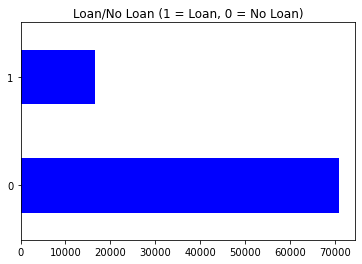

In [59]:
plt.figure(figsize=(6,4))

y.value_counts().plot(kind='barh', color="blue")

plt.title("Loan/No Loan (1 = Loan, 0 = No Loan)")

In [65]:
# Balancing Dataset with SMOTETomek technique:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X1,y1=smk.fit_resample(X,y)

0    69191
1    69191
Name: Loan/No Loan, dtype: int64


Text(0.5, 1.0, 'Loan/No Loan (1 = Loan, 0 = No Loan)')

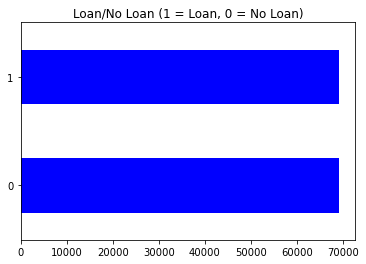

In [66]:
print(y1.value_counts())
plt.figure(figsize=(6,4))

y1.value_counts().plot(kind='barh', color="blue")

plt.title("Loan/No Loan (1 = Loan, 0 = No Loan)")

In [67]:
# Test Datatset:
x = test    # x = testdataset for test independent attributes.

#### Scaling Dataset:

In [68]:
# Scaling train dataset:
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X1), columns = X1.columns, index = X1.index)
X_scaled.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,...,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_I,Claim Type_J
0,0.405265,-0.532577,-0.333359,-0.054759,-1.630241,0.949044,-0.269328,-1.441373,0.213012,-0.676750,...,-0.104612,-0.076923,-0.059794,-0.168125,-0.016573,-0.072673,-0.055175,-0.028333,0.018235,-0.018235
1,0.528895,-0.603416,-0.333359,-0.054759,-0.392801,-0.590426,-0.269328,1.265705,-0.892135,-0.676750,...,9.559176,-0.076923,-0.059794,-0.168125,-0.016573,-0.072673,-0.055175,-0.028333,0.018235,-0.018235
2,-1.238976,-0.801847,-0.333359,-0.054759,-1.040922,-1.466547,-0.269328,-1.349756,0.562006,0.443935,...,9.559176,-0.076923,-0.059794,-0.168125,-0.016573,-0.072673,-0.055175,-0.028333,0.018235,-0.018235
3,0.703100,-0.729083,-0.333359,-0.054759,0.784530,-0.402686,-0.269328,-0.625542,0.848360,0.443935,...,-0.104612,-0.076923,-0.059794,-0.168125,-0.016573,-0.072673,-0.055175,-0.028333,0.018235,-0.018235
4,-0.551874,0.980060,4.914454,-0.054759,-0.275199,0.661176,-0.269328,-0.311424,0.553057,1.564620,...,-0.104612,-0.076923,-0.059794,-0.168125,-0.016573,-0.072673,-0.055175,-0.028333,0.018235,-0.018235


In [69]:
# Scaling test dataset:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x), columns = x.columns, index = x.index)
x_scaled.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,...,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_I,Claim Type_J
0,-0.889448,0.082947,-0.379018,-0.068065,-1.028120,-0.546665,-0.355300,-1.553378,-0.415559,0.335261,...,7.796104,-0.094798,-0.076644,-0.21751,-0.0231,-0.090404,-0.067283,-0.033485,0.0231,-0.0231
1,0.653835,0.137428,-0.379018,-0.068065,-0.161535,2.362332,-0.355300,-1.305033,-0.466531,0.335261,...,-0.128269,-0.094798,-0.076644,-0.21751,-0.0231,-0.090404,-0.067283,-0.033485,0.0231,-0.0231
2,-1.582725,0.716732,-0.379018,-0.068065,1.491281,2.362332,-0.355300,0.567729,1.538374,1.372065,...,-0.128269,-0.094798,-0.076644,-0.21751,-0.0231,-0.090404,-0.067283,-0.033485,0.0231,-0.0231
3,-0.995564,-0.280265,0.747580,-0.068065,-0.285156,-0.451678,-0.355300,-1.565592,-1.541195,1.372065,...,-0.128269,-0.094798,-0.076644,-0.21751,-0.0231,-0.090404,-0.067283,-0.033485,0.0231,-0.0231
4,0.265077,0.191910,-0.379018,-0.068065,-1.509006,-0.033138,1.420491,-0.608854,0.327785,0.335261,...,-0.128269,-0.094798,-0.076644,-0.21751,-0.0231,-0.090404,-0.067283,-0.033485,0.0231,-0.0231


In [ ]:
# PCA:

In [70]:
# Train data:
X_cov_mat = np.cov(X_scaled.T)

print(X_cov_mat[0:5])


# test data:
x_cov_mat = np.cov(x_scaled.T)

print(x_cov_mat[0:5])

[[ 1.00000723e+00  3.47506483e-02  8.71804498e-02  2.56911032e-02
   1.06207410e-01  6.14648119e-02  1.12502040e-01 -9.67368153e-03
  -8.01083878e-02 -4.24803728e-02  7.64361732e-03 -6.08485688e-02
   3.98292228e-02  9.12204355e-02  4.45035518e-02 -4.45783054e-02
   6.69793723e-02  5.84132542e-02  4.44091922e-02  3.70309076e-02
   5.08527462e-02  4.07346657e-02  3.87058965e-02  2.90651105e-02
   3.29431597e-02  3.54578237e-02  5.84686809e-02  6.28573652e-02
   7.49511828e-02  7.19275099e-02  5.47219886e-02  4.15568395e-02
   5.06655745e-02  5.02053121e-02  4.65383133e-02  4.33879608e-02
   1.05679006e-01  5.34970201e-02  1.17283781e-01  7.48703058e-02
   8.14239279e-02  2.72502519e-02  1.36136420e-02  6.92418974e-02
   7.49514570e-02  7.92954774e-02  6.86552152e-02  5.06119328e-02
   1.79527807e-02  2.97752312e-02  6.25939988e-02  4.97237228e-02
   8.73044552e-02  1.25463795e-01  2.51467918e-02  2.52274702e-01
  -1.82080173e-02  2.60743343e-02 -6.51816298e-03 -7.39125133e-03
   1.00797

In [71]:
# Train data:
X_eig_val, X_eig_vec = np.linalg.eig(X_cov_mat)
print('Train_Eigenvalue :', X_eig_val )
print('Train_Eigenvector :', X_eig_vec )


# Test data:
x_eig_val, x_eig_vec = np.linalg.eig(x_cov_mat)
print('Test_Eigenvalue :', x_eig_val )
print('Test_Eigenvector :', x_eig_vec )

Train_Eigenvalue : [ 3.50698620e+00  2.81582084e+00  2.37576385e+00  2.00406765e+00
  1.60347888e+00  9.80063201e-02 -1.70445443e-15  1.21804441e-01
  1.40949893e-01  1.57040612e-01  1.64188718e-01  2.00035222e-01
  1.84061405e-01  1.55904172e+00  3.50610807e-01  3.85688919e-01
  1.47665583e+00  4.41249545e-01  4.74826438e-01  5.13862815e-01
  5.60537405e-01  1.43227047e+00  6.21189557e-01  1.34824625e+00
  1.25801902e+00  1.24560930e+00  8.16738106e-01  1.21412201e+00
  1.19013634e+00  1.17939916e+00  8.54943160e-01  8.71709508e-01
  1.14142900e+00  8.83758201e-01  1.12298077e+00  9.12662810e-01
  9.22513849e-01  9.32808832e-01  9.36884051e-01  1.09251902e+00
  1.08747083e+00  1.08064182e+00  9.53651157e-01  1.07612878e+00
  1.07017092e+00  1.06604179e+00  1.06347576e+00  1.05813405e+00
  9.71085380e-01  1.05329705e+00  1.05126807e+00  1.05052876e+00
  1.04656229e+00  9.77333088e-01  1.04387257e+00  1.04027293e+00
  1.03737922e+00  1.03617768e+00  1.03474362e+00  9.80880968e-01
  1.02

In [72]:
# decide no. of principle components by kaiser criterion:
(X_eig_val >= 1).sum()

45

In [73]:
(x_eig_val >= 1).sum()

45

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 45)

In [75]:
# train data:
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 1.99920887, -2.3678977 ,  1.1789853 , ...,  0.31719124,
         0.41806673, -0.04800864],
       [ 0.04358139, -2.74324997,  2.98805172, ...,  3.11987653,
        -0.22276492, -0.94054355],
       [-2.16946745, -2.0398642 , -0.74179308, ...,  2.80887342,
        -0.28211246,  0.11185301],
       ...,
       [-0.49233164, -0.6543359 , -1.67904781, ..., -0.05714455,
        -0.23842463,  0.10354265],
       [-1.42011819, -1.82387933, -0.33550026, ..., -0.16912288,
        -0.52670431,  0.47450209],
       [-1.98580068, -0.24192531, -1.08972444, ..., -0.1180323 ,
        -0.06953268,  0.10366251]])

In [76]:
#test data:
x_pca = pca.fit_transform(x_scaled)
x_pca

array([[-1.98101346, -0.2810716 ,  1.05491915, ..., -0.47965009,
        -2.42706502,  0.5572034 ],
       [ 2.98578546,  2.3908692 , -0.38024947, ..., -0.62040835,
        -0.09219092, -0.0942661 ],
       [ 5.46839289, -0.26220359,  0.66803335, ...,  0.01971991,
        -0.95132194,  0.23386288],
       ...,
       [-0.53788162, -2.78129519,  1.73337537, ...,  0.58537878,
        -0.46322819, -0.43553362],
       [ 0.67624901, -1.77407163, -0.00873914, ...,  0.5840923 ,
        -0.74049958, -0.39643917],
       [-0.15175382,  1.65378058,  1.64799424, ...,  1.23531552,
         1.05131575,  0.23816407]])

In [79]:
pca = PCA(n_components = 45)
X_train = pd.DataFrame(pca.fit_transform(X_scaled), columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9',
                                                               'P10','P11','P12','P13','P14','P15','P16','P17','P18','P19',
                                                               'P20','P21','P22','P23','P24','P25','P26','P27','P28','P29',
                                                               'P30','P31','P32','P33','P34','P35','P36','P37','P38','P39',
                                                               'P40','P41','P42','P43','P44','P45'])
                                                               
x_test = pd.DataFrame(pca.fit_transform(x_scaled), columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9',
                                                               'P10','P11','P12','P13','P14','P15','P16','P17','P18','P19',
                                                               'P20','P21','P22','P23','P24','P25','P26','P27','P28','P29',
                                                               'P30','P31','P32','P33','P34','P35','P36','P37','P38','P39',
                                                               'P40','P41','P42','P43','P44','P45'])                    

In [78]:
from sklearn.model_selection import train_test_split

# import various functions from sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import f1_score

!pip install xgboost
from xgboost import XGBClassifier

You should consider upgrading via the 'C:\ProgramData\Anaconda2\python.exe -m pip install --upgrade pip' command.


In [80]:
# train test split:
X_train , X_test , y_train , y_test = train_test_split(X_train , y1 , test_size = 0.3 , random_state= 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (96867, 45)
y_train (96867,)
X_test (41515, 45)
y_test (41515,)


## 4 Modelling + HyperParameter Tuning

## Model 1

In [209]:
# DecisionTree:

In [104]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [105]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([0, 1, 0, ..., 1, 1, 1])

In [106]:
F1_score_dt =  f1_score(y_test , y_pred_dt)
F1_score_dt

0.8208213444938531

In [107]:
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


[[16721  3918]
 [ 3617 17259]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     20639
           1       0.81      0.83      0.82     20876

    accuracy                           0.82     41515
   macro avg       0.82      0.82      0.82     41515
weighted avg       0.82      0.82      0.82     41515



## Model 2

In [ ]:
# Random forest:

In [81]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf.fit(X_train, y_train)
rf_model

RandomForestClassifier(n_estimators=10, random_state=10)

In [82]:
y_predrf = rf_model.predict(X_test)
y_predrf
len(y_predrf)

41515

In [84]:
F1_score_rf =  f1_score(y_test , y_predrf)
F1_score_rf

0.8585322258437598

## Model 3- Best Model

In [106]:
# Gradient boosting:

In [85]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [86]:
y_predict_gb = gboost_model.predict(X_test)

print('accuracy_score_gb' ,accuracy_score(y_test , y_predict_gb))

accuracy_score_gb 0.8851740334818741


In [89]:
F1_score_gb =  f1_score(y_test , y_predict_gb)
F1_score_gb

0.8780974299961641

In [90]:
print(confusion_matrix(y_test, y_predict_gb))

[[19579  1060]
 [ 3707 17169]]


In [93]:
print(classification_report(y_test, y_predict_gb))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     20639
           1       0.94      0.82      0.88     20876

    accuracy                           0.89     41515
   macro avg       0.89      0.89      0.88     41515
weighted avg       0.89      0.89      0.88     41515



## Model 4-Best Model

In [107]:
# X-g boost :

In [94]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [95]:
y_predict_xg = xgb_model.predict(X_test)

print('accuracy_score_gb' ,accuracy_score(y_test , y_predict_xg))

accuracy_score_gb 0.8812718294592315


In [97]:
F1_score_xg =  f1_score(y_test , y_predict_xg)
F1_score_xg

0.8751108521042895

In [98]:
print(classification_report(y_test, y_predict_xg))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     20639
           1       0.93      0.83      0.88     20876

    accuracy                           0.88     41515
   macro avg       0.89      0.88      0.88     41515
weighted avg       0.89      0.88      0.88     41515



In [ ]:
# prediction : on test set test set = x_test45:

In [99]:
y_predictx = xgb_model.predict(x_test)
y_predictx

array([0, 1, 0, ..., 0, 1, 0])

In [100]:
len(test2['ID'])

37500

In [101]:
len(x)

37500

In [102]:
len(y_predictx)

37500

In [109]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient boosting', 'X-g boost'],
    'F1_Score': [F1_score_dt, F1_score_rf, F1_score_gb, F1_score_xg]})
models.sort_values(by='F1_Score', ascending=True)

,Model,F1_Score
0,Decision Tree,0.820821
1,Random Forest,0.858532
2,Gradient boosting,0.875111
3,X-g boost,0.875111


In [110]:
submission = pd.DataFrame({ "ID": test2["ID"], "Loan/No Loan": y_predictx})
submission

,ID,Loan/No Loan
0,198980,0
1,167688,1
2,198768,0
3,192564,0
4,151199,0
...,...,...
37495,191405,0
37496,164868,0
37497,163156,0
37498,169610,1


In [111]:
submission['Loan/No Loan'].value_counts()

0    19549
1    17951
Name: Loan/No Loan, dtype: int64

In [113]:
submission.to_csv('C:/Users/Pankaj/Desktop/hackathon/Loan.csv', index=False)
